# Cluster premutataion test for TF analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.time_frequency import tfr_morlet
from mne.stats import permutation_cluster_test
from mne.datasets import sample
import readData as rd 

## loading the data

In [2]:
ch_name = 'PO8'

In [3]:
ids = rd.generateIDs()
raw, evts, eventsdict = rd.readBids('004')
epochs = rd.get_epoched_Data(raw, evts, eventsdict)
epochs.load_data()

Reading /home/jinaz/Desktop/EEG-semproject/bids/n170/sub-004/ses-N170/eeg/sub-004_ses-N170_task-N170_eeg.fdt
Reading events from bids/n170/sub-004/ses-N170/eeg/sub-004_ses-N170_task-N170_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> respo

/home/jinaz/Desktop/EEG-semproject/readData.py:32: RuntimeWarning: Data file name in EEG.data (sub-004_task-N170_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-004_ses-N170_task-N170_eeg.fdt).
  raw = read_raw_bids(bids_path)


    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renami

/home/jinaz/Desktop/EEG-semproject/readData.py:32: RuntimeWarning: Participants file not found for sub-004_ses-N170_task-N170_eeg.set... Not reading in any particpants.tsv data.
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 6759 samples (6.601 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
bids/n170/sub-004/ses-N170/eeg/sub-004_ses-N170_task-N170_
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components


/home/jinaz/Desktop/EEG-semproject/ccs_eeg_semesterproject.py:102: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ica.ICA(method='imported_eeglab', n_components=n_components)
/home/jinaz/Desktop/EEG-semproject/ccs_eeg_semesterproject.py:71: UserWarning: loadtxt: Empty input file: "bids/n170/sub-004/ses-N170/eeg/sub-004_ses-N170_task-N170_badChannels.tsv"
  badChannels = np.loadtxt(fn + 'badChannels.tsv', delimiter='\t')
/home/jinaz/Desktop/EEG-semproject/readData.py:48: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads()


    Projecting back using 30 PCA components
Used Annotations descriptions: ['response/201', 'response/202', 'stimulus/1', 'stimulus/10', 'stimulus/101', 'stimulus/102', 'stimulus/103', 'stimulus/104', 'stimulus/105', 'stimulus/106', 'stimulus/107', 'stimulus/108', 'stimulus/109', 'stimulus/11', 'stimulus/110', 'stimulus/111', 'stimulus/112', 'stimulus/113', 'stimulus/114', 'stimulus/115', 'stimulus/116', 'stimulus/117', 'stimulus/118', 'stimulus/119', 'stimulus/12', 'stimulus/120', 'stimulus/121', 'stimulus/122', 'stimulus/123', 'stimulus/124', 'stimulus/125', 'stimulus/126', 'stimulus/127', 'stimulus/128', 'stimulus/129', 'stimulus/13', 'stimulus/130', 'stimulus/131', 'stimulus/132', 'stimulus/133', 'stimulus/134', 'stimulus/135', 'stimulus/136', 'stimulus/137', 'stimulus/138', 'stimulus/139', 'stimulus/14', 'stimulus/140', 'stimulus/141', 'stimulus/142', 'stimulus/143', 'stimulus/144', 'stimulus/145', 'stimulus/146', 'stimulus/147', 'stimulus/148', 'stimulus/149', 'stimulus/15', 'sti

Number of events,603
Events,cars: 76faces: 76response_correct: 276response_false: 26scrambled_cars: 77scrambled_faces: 72
Time range,-0.200 – 1.000 sec
Baseline,-0.200 – 0.000 sec


In [4]:
epochs_condition_1 = epochs['faces']
epochs_condition_1.pick_channels([ch_name])
epochs_condition_2 = epochs['cars']
epochs_condition_2.pick_channels([ch_name])

Number of events,76
Events,cars: 76
Time range,-0.200 – 1.000 sec
Baseline,-0.200 – 0.000 sec


## compute morlet

In [5]:
decim = 2
freqs = np.logspace(*np.log10([5, 80]), num=25)
n_cycles = 3

tfr_epochs_1 = tfr_morlet(epochs_condition_1, freqs,
                          n_cycles=n_cycles, decim=decim,
                          return_itc=False, average=False)

tfr_epochs_2 = tfr_morlet(epochs_condition_2, freqs,
                          n_cycles=n_cycles, decim=decim,
                          return_itc=False, average=False)

tfr_epochs_1.apply_baseline(mode='ratio', baseline=(None, 0))
tfr_epochs_2.apply_baseline(mode='ratio', baseline=(None, 0))



epochs_power_1 = tfr_epochs_1.data[:, 0, :, :]  # only 1 channel as 3D matrix
epochs_power_2 = tfr_epochs_2.data[:, 0, :, :]  # only 1 channel as 3D matrix

Not setting metadata
Not setting metadata
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)


## run cluter permutation test

run 100 permutations for faster results for demonstation. Default should be 1000+

In [6]:
threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = \
    permutation_cluster_test([epochs_power_1, epochs_power_2], out_type='mask',
                             n_permutations=100, threshold=threshold, tail=0)

stat_fun(H1): min=0.000000 max=27.673057
Running initial clustering
Found 11 clusters
Permuting 99 times...


100%|██████████|  : 99/99 [00:00<00:00,  112.32it/s]


Computing cluster p-values
Done.


In [15]:
T_obs.shape

(25, 615)

## Plot the result

Need more than one channel to make topography for eeg. Disabling interactivity.


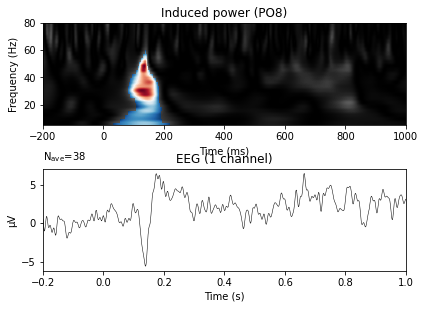

In [7]:

times = 1e3 * epochs_condition_1.times  # change unit to ms
evoked_condition_1 = epochs_condition_1.average()
evoked_condition_2 = epochs_condition_2.average()

plt.figure()
plt.subplots_adjust(0.12, 0.08, 0.96, 0.94, 0.2, 0.43)

plt.subplot(2, 1, 1)
# Create new stats image with only significant clusters
T_obs_plot = np.nan * np.ones_like(T_obs)
for c, p_val in zip(clusters, cluster_p_values):
    if p_val <= 0.05:
        T_obs_plot[c] = T_obs[c]

plt.imshow(T_obs,
           extent=[times[0], times[-1], freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='gray')
plt.imshow(T_obs_plot,
           extent=[times[0], times[-1], freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='RdBu_r')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.title('Induced power (%s)' % ch_name)

ax2 = plt.subplot(2, 1, 2)
evoked_contrast = mne.combine_evoked([evoked_condition_1, evoked_condition_2],
                                     weights=[1, -1])
evoked_contrast.plot(axes=ax2, time_unit='s')

plt.show()

results may differ for each subject and significant difference is colored in the black/white surrounding. The p-value is compared to 0.05 significancy. 